In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters
import numpy as np 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 10s 527ms/step - loss: 3.0582 - accuracy: 0.4138 - val_loss: 1.6702 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 1s 67ms/step - loss: 1.4789 - accuracy: 0.7003 - val_loss: 1.3089 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 81ms/step - loss: 1.0842 - accuracy: 0.7727 - val_loss: 1.1366 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 0.8372 - accuracy: 0.82 - 1s 68ms/step - loss: 0.8361 - accuracy: 0.8219 - val_loss: 1.0438 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 1s 66ms/step - loss: 0.6684 - accuracy: 0.8616 - val_loss: 0.9613 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 65ms/step - loss: 0.5178 - accuracy: 0.8949 - val_loss: 0.9302 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 63ms/step - loss: 0.4237 - accuracy: 0.9117 - val_loss:

In [15]:
import matplotlib.pyplot as plt

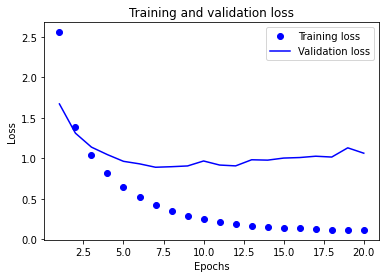

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

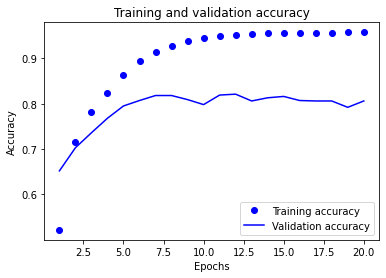

In [18]:
plt.clf()   # 그래프를 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 88ms/step - loss: 3.2375 - accuracy: 0.4054 - val_loss: 1.8687 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 1.5971 - accuracy: 0.6953 - val_loss: 1.3383 - val_accuracy: 0.7260
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.1176 - accuracy: 0.7687 - val_loss: 1.1488 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8631 - accuracy: 0.8158 - val_loss: 1.0413 - val_accuracy: 0.7680
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6645 - accuracy: 0.8628 - val_loss: 0.9846 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5241 - accuracy: 0.8909 - val_loss: 0.9249 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 1s 55ms/step - loss: 0.4204 - accuracy: 0.9140 - val_loss: 0.9097 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [21]:
results

[0.975980818271637, 0.7880676984786987]

In [22]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19056099732858414

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0000002

In [26]:
np.argmax(predictions[0])

3

In [27]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [28]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 5s 41ms/step - loss: 3.5327 - accuracy: 0.0610 - val_loss: 2.6696 - val_accuracy: 0.1380
Epoch 2/20
63/63 [==============================] - 2s 28ms/step - loss: 2.2813 - accuracy: 0.4544 - val_loss: 1.6366 - val_accuracy: 0.6280
Epoch 3/20
63/63 [==============================] - 2s 28ms/step - loss: 1.4522 - accuracy: 0.6446 - val_loss: 1.4381 - val_accuracy: 0.6300
Epoch 4/20
63/63 [==============================] - 2s 27ms/step - loss: 1.2110 - accuracy: 0.6682 - val_loss: 1.3383 - val_accuracy: 0.6710
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 1.0713 - accuracy: 0.7154 - val_loss: 1.2844 - val_accuracy: 0.6860
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 0.9818 - accuracy: 0.7472 - val_loss: 1.2884 - val_accuracy: 0.6850
Epoch 7/20
63/63 [==============================] - 1s 23ms/step - loss: 0.8582 - accuracy: 0.7799 - val_loss: 1.2667 - val_accuracy: 0.7060
Epoch 8/20
63

## 과대적합과 과소적합

In [30]:
import keras
keras.__version__

'2.4.3'

In [31]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [32]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [33]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [34]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [35]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 16s 282ms/step - loss: 0.5274 - acc: 0.7575 - val_loss: 0.3286 - val_acc: 0.8788
Epoch 2/20
49/49 [==============================] - 3s 58ms/step - loss: 0.2606 - acc: 0.9129 - val_loss: 0.2872 - val_acc: 0.8860
Epoch 3/20
49/49 [==============================] - 3s 54ms/step - loss: 0.1977 - acc: 0.9311 - val_loss: 0.2881 - val_acc: 0.8846
Epoch 4/20
49/49 [==============================] - 3s 54ms/step - loss: 0.1614 - acc: 0.9431 - val_loss: 0.3135 - val_acc: 0.8750
Epoch 5/20
49/49 [==============================] - 3s 54ms/step - loss: 0.1386 - acc: 0.9530 - val_loss: 0.3279 - val_acc: 0.8746
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1191 - acc: 0.9604 - val_loss: 0.3362 - val_acc: 0.8750
Epoch 7/20
49/49 [==============================] - 2s 46ms/step - loss: 0.0976 - acc: 0.9692 - val_loss: 0.3629 - val_acc: 0.8719
Epoch 8/20
49/49 [==============================] - 2s 46ms/step - loss: 0.0859 -

In [36]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 18s 321ms/step - loss: 0.6448 - acc: 0.5732 - val_loss: 0.5563 - val_acc: 0.7618
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5253 - acc: 0.8067 - val_loss: 0.4810 - val_acc: 0.8478
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.4323 - acc: 0.8854 - val_loss: 0.3845 - val_acc: 0.8800
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3154 - acc: 0.9211 - val_loss: 0.3192 - val_acc: 0.8855
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2344 - acc: 0.9241 - val_loss: 0.2844 - val_acc: 0.8893
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1935 - acc: 0.9352 - val_loss: 0.2877 - val_acc: 0.8863
Epoch 7/20
49/49 [==============================] - 2s 35ms/step - loss: 0.1669 - acc: 0.9456 - val_loss: 0.2862 - val_acc: 0.8859
Epoch 8/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1469 -

In [37]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [38]:
import matplotlib.pyplot as plt

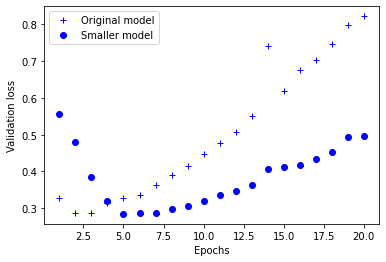

In [39]:
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [40]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [41]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 39s 653ms/step - loss: 0.7654 - acc: 0.7157 - val_loss: 0.3768 - val_acc: 0.8282
Epoch 2/20
49/49 [==============================] - 19s 399ms/step - loss: 0.2156 - acc: 0.9138 - val_loss: 0.3178 - val_acc: 0.8750
Epoch 3/20
49/49 [==============================] - 19s 399ms/step - loss: 0.1260 - acc: 0.9543 - val_loss: 0.4885 - val_acc: 0.8327
Epoch 4/20
49/49 [==============================] - 20s 400ms/step - loss: 0.0581 - acc: 0.9852 - val_loss: 0.6195 - val_acc: 0.8567
Epoch 5/20
49/49 [==============================] - 19s 396ms/step - loss: 0.0149 - acc: 0.9977 - val_loss: 0.4178 - val_acc: 0.8797
Epoch 6/20
49/49 [==============================] - 19s 397ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6524 - val_acc: 0.8835
Epoch 7/20
49/49 [==============================] - 20s 407ms/step - loss: 0.0043 - acc: 0.9997 - val_loss: 2.6841 - val_acc: 0.7301
Epoch 8/20
49/49 [==============================] - 20s 410ms/step - 

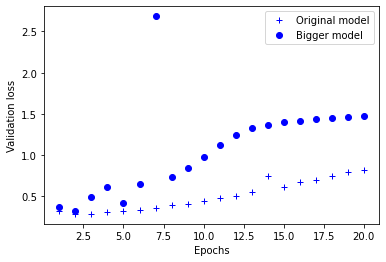

In [42]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

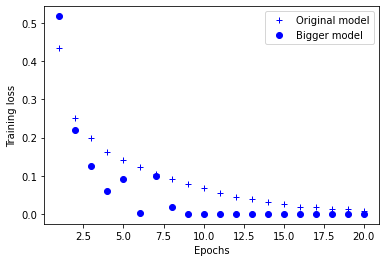

In [43]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [45]:

from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [46]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 17s 296ms/step - loss: 0.6062 - acc: 0.7376 - val_loss: 0.4024 - val_acc: 0.8691
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3434 - acc: 0.9007 - val_loss: 0.3440 - val_acc: 0.8862
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2760 - acc: 0.9229 - val_loss: 0.3494 - val_acc: 0.8789
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2565 - acc: 0.9287 - val_loss: 0.3389 - val_acc: 0.8849
Epoch 5/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2392 - acc: 0.9368 - val_loss: 0.3419 - val_acc: 0.8848
Epoch 6/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2308 - acc: 0.9400 - val_loss: 0.3861 - val_acc: 0.8689
Epoch 7/20
49/49 [==============================] - 2s 37ms/step - loss: 0.2253 - acc: 0.9382 - val_loss: 0.3559 - val_acc: 0.8793
Epoch 8/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2138 -

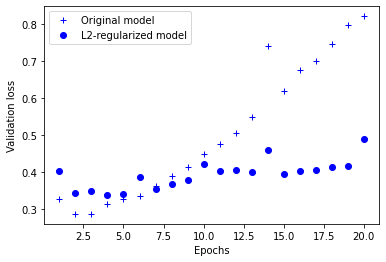

In [47]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [48]:
from keras import regularizers

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)

In [49]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [51]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 20s 359ms/step - loss: 0.6659 - acc: 0.7437 - val_loss: 0.4360 - val_acc: 0.8698
Epoch 2/20
49/49 [==============================] - 3s 58ms/step - loss: 0.3906 - acc: 0.8928 - val_loss: 0.3861 - val_acc: 0.8804
Epoch 3/20
49/49 [==============================] - 3s 52ms/step - loss: 0.3338 - acc: 0.9083 - val_loss: 0.4147 - val_acc: 0.8624
Epoch 4/20
49/49 [==============================] - 2s 50ms/step - loss: 0.3165 - acc: 0.9107 - val_loss: 0.3598 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 2s 50ms/step - loss: 0.2966 - acc: 0.9221 - val_loss: 0.3691 - val_acc: 0.8825
Epoch 6/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2996 - acc: 0.9179 - val_loss: 0.3732 - val_acc: 0.8809
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2944 - acc: 0.9189 - val_loss: 0.3693 - val_acc: 0.8826
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2857 -

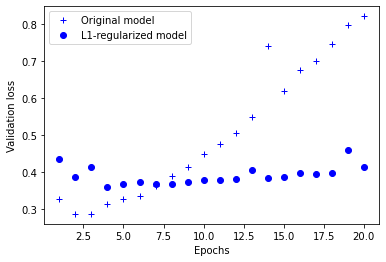

In [52]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [53]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [55]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 20s 229ms/step - loss: 0.6733 - acc: 0.7488 - val_loss: 0.4273 - val_acc: 0.8789 - loss: 0.7
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3851 - acc: 0.8979 - val_loss: 0.3966 - val_acc: 0.8749
Epoch 3/20
49/49 [==============================] - 2s 43ms/step - loss: 0.3363 - acc: 0.9082 - val_loss: 0.3613 - val_acc: 0.8887
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3167 - acc: 0.9117 - val_loss: 0.3730 - val_acc: 0.8821
Epoch 5/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2981 - acc: 0.9219 - val_loss: 0.3695 - val_acc: 0.8844
Epoch 6/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2917 - acc: 0.9222 - val_loss: 0.3841 - val_acc: 0.8765
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2911 - acc: 0.9239 - val_loss: 0.3800 - val_acc: 0.8804
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - lo

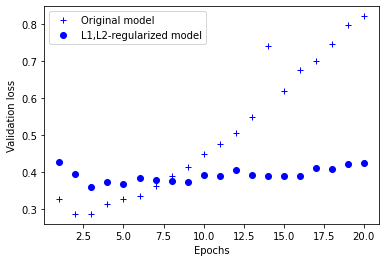

In [56]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [57]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [58]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 16s 275ms/step - loss: 0.6406 - acc: 0.6173 - val_loss: 0.4450 - val_acc: 0.8655
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.4648 - acc: 0.7945 - val_loss: 0.3299 - val_acc: 0.8811
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3659 - acc: 0.8538 - val_loss: 0.2963 - val_acc: 0.8857
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.3045 - acc: 0.8860 - val_loss: 0.2778 - val_acc: 0.8892
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2621 - acc: 0.9080 - val_loss: 0.2799 - val_acc: 0.8882
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2372 - acc: 0.9227 - val_loss: 0.2911 - val_acc: 0.8866
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2073 - acc: 0.9302 - val_loss: 0.3082 - val_acc: 0.8852
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1875 -

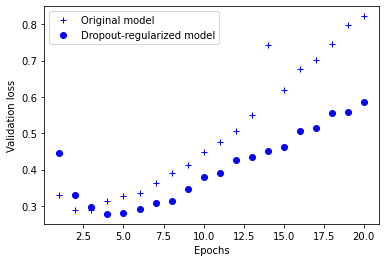

In [59]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()